In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import classification_report,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'../DATA/fraud-detection/creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.isnull().sum().max()

0

In [5]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


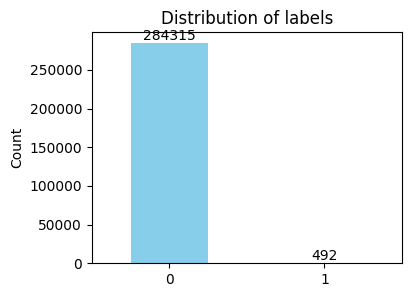

In [6]:
value_counts = df['Class'].value_counts()
plt.figure(figsize=(4, 3))
ax =  value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.05, str(i.get_height()), ha='center', va='bottom')
plt.show()

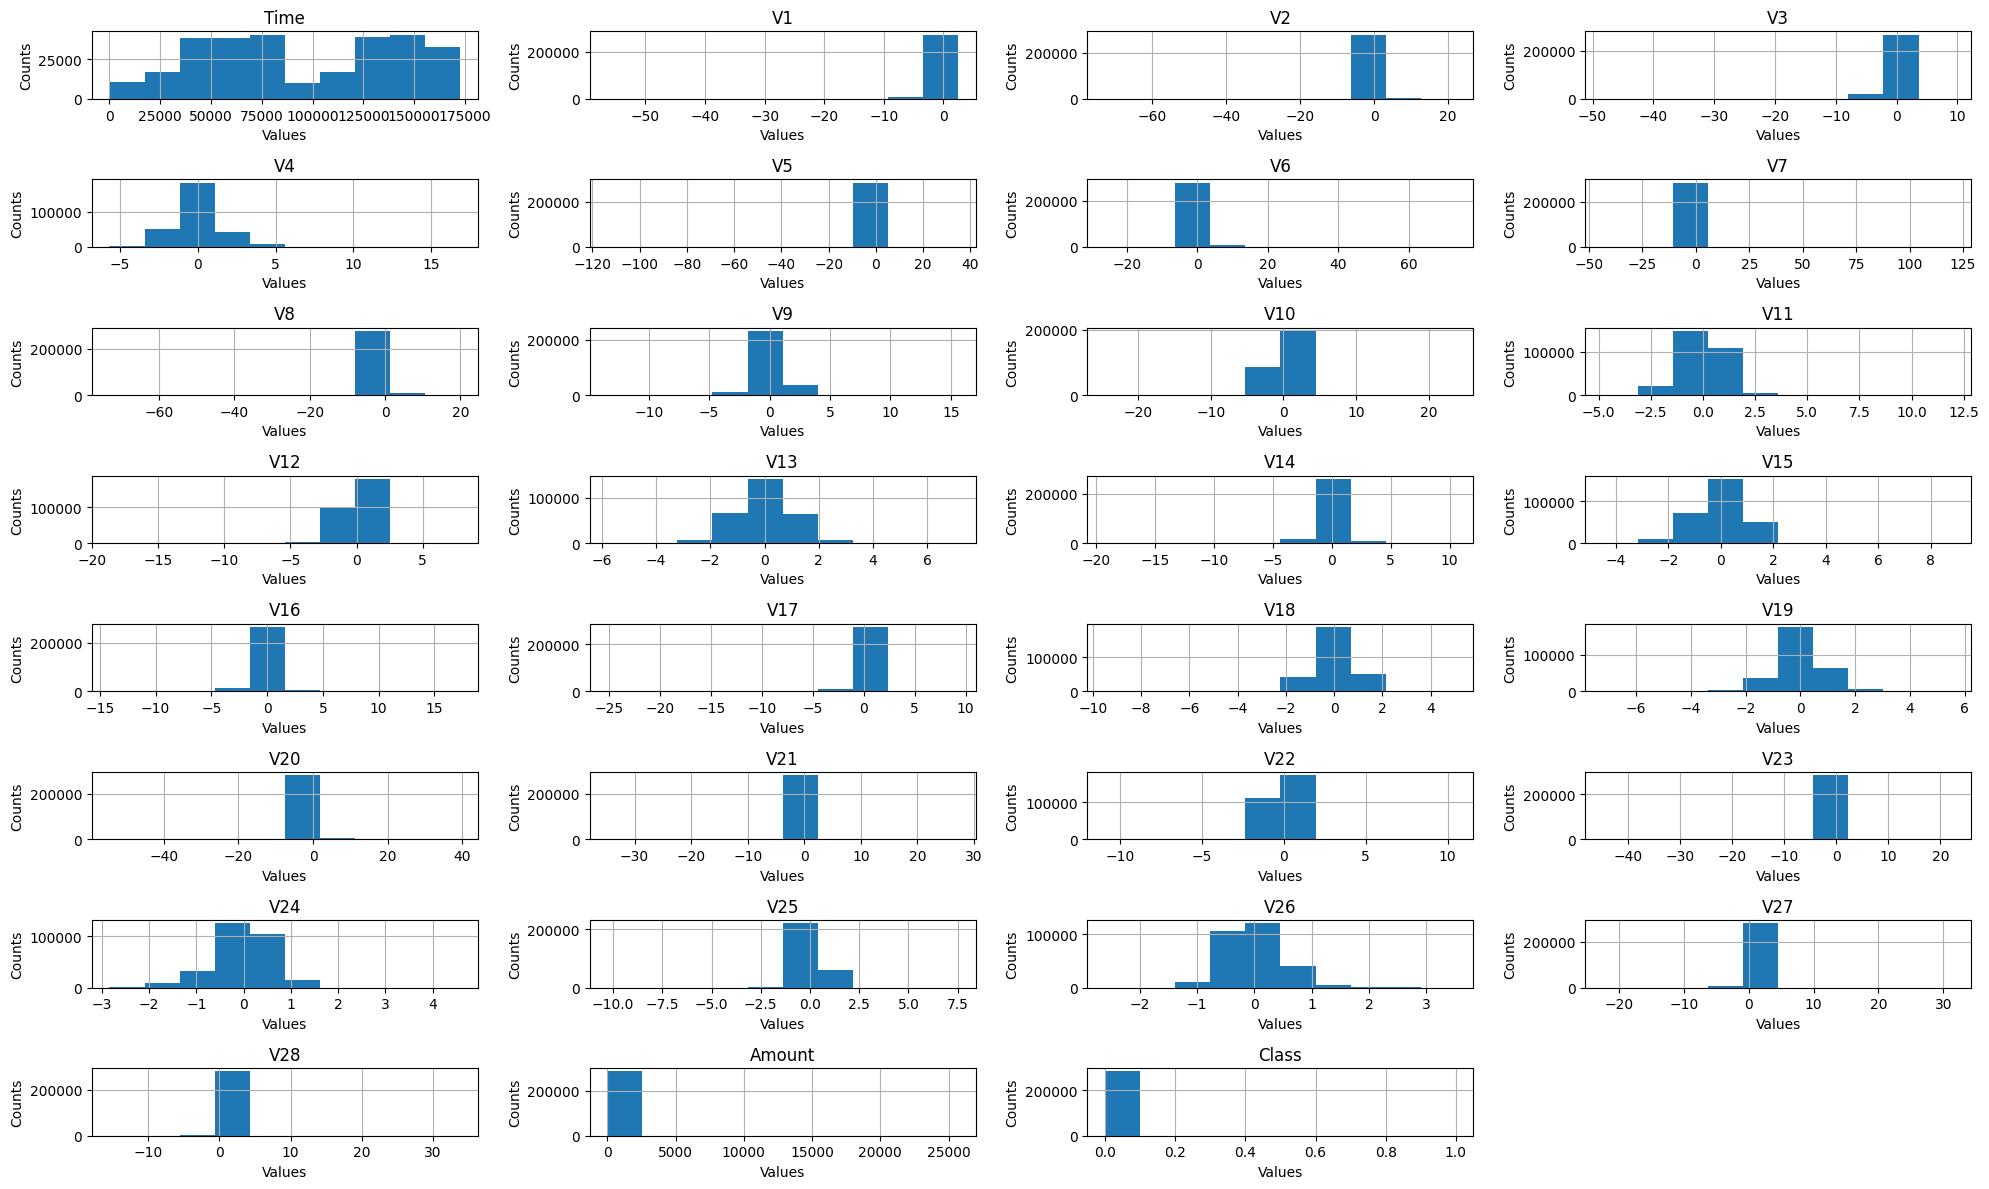

In [37]:
num_columns = len(df.columns)

# Set up the figure and axes
fig, axes = plt.subplots(8, 4, figsize=(20, 12))
axes = axes.flatten()  # Flatten the 3x5 array of axes

# Plot the value counts for each column
for i, col in enumerate(df.columns):
    ax = axes[i]

    df[col].hist(ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Counts')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

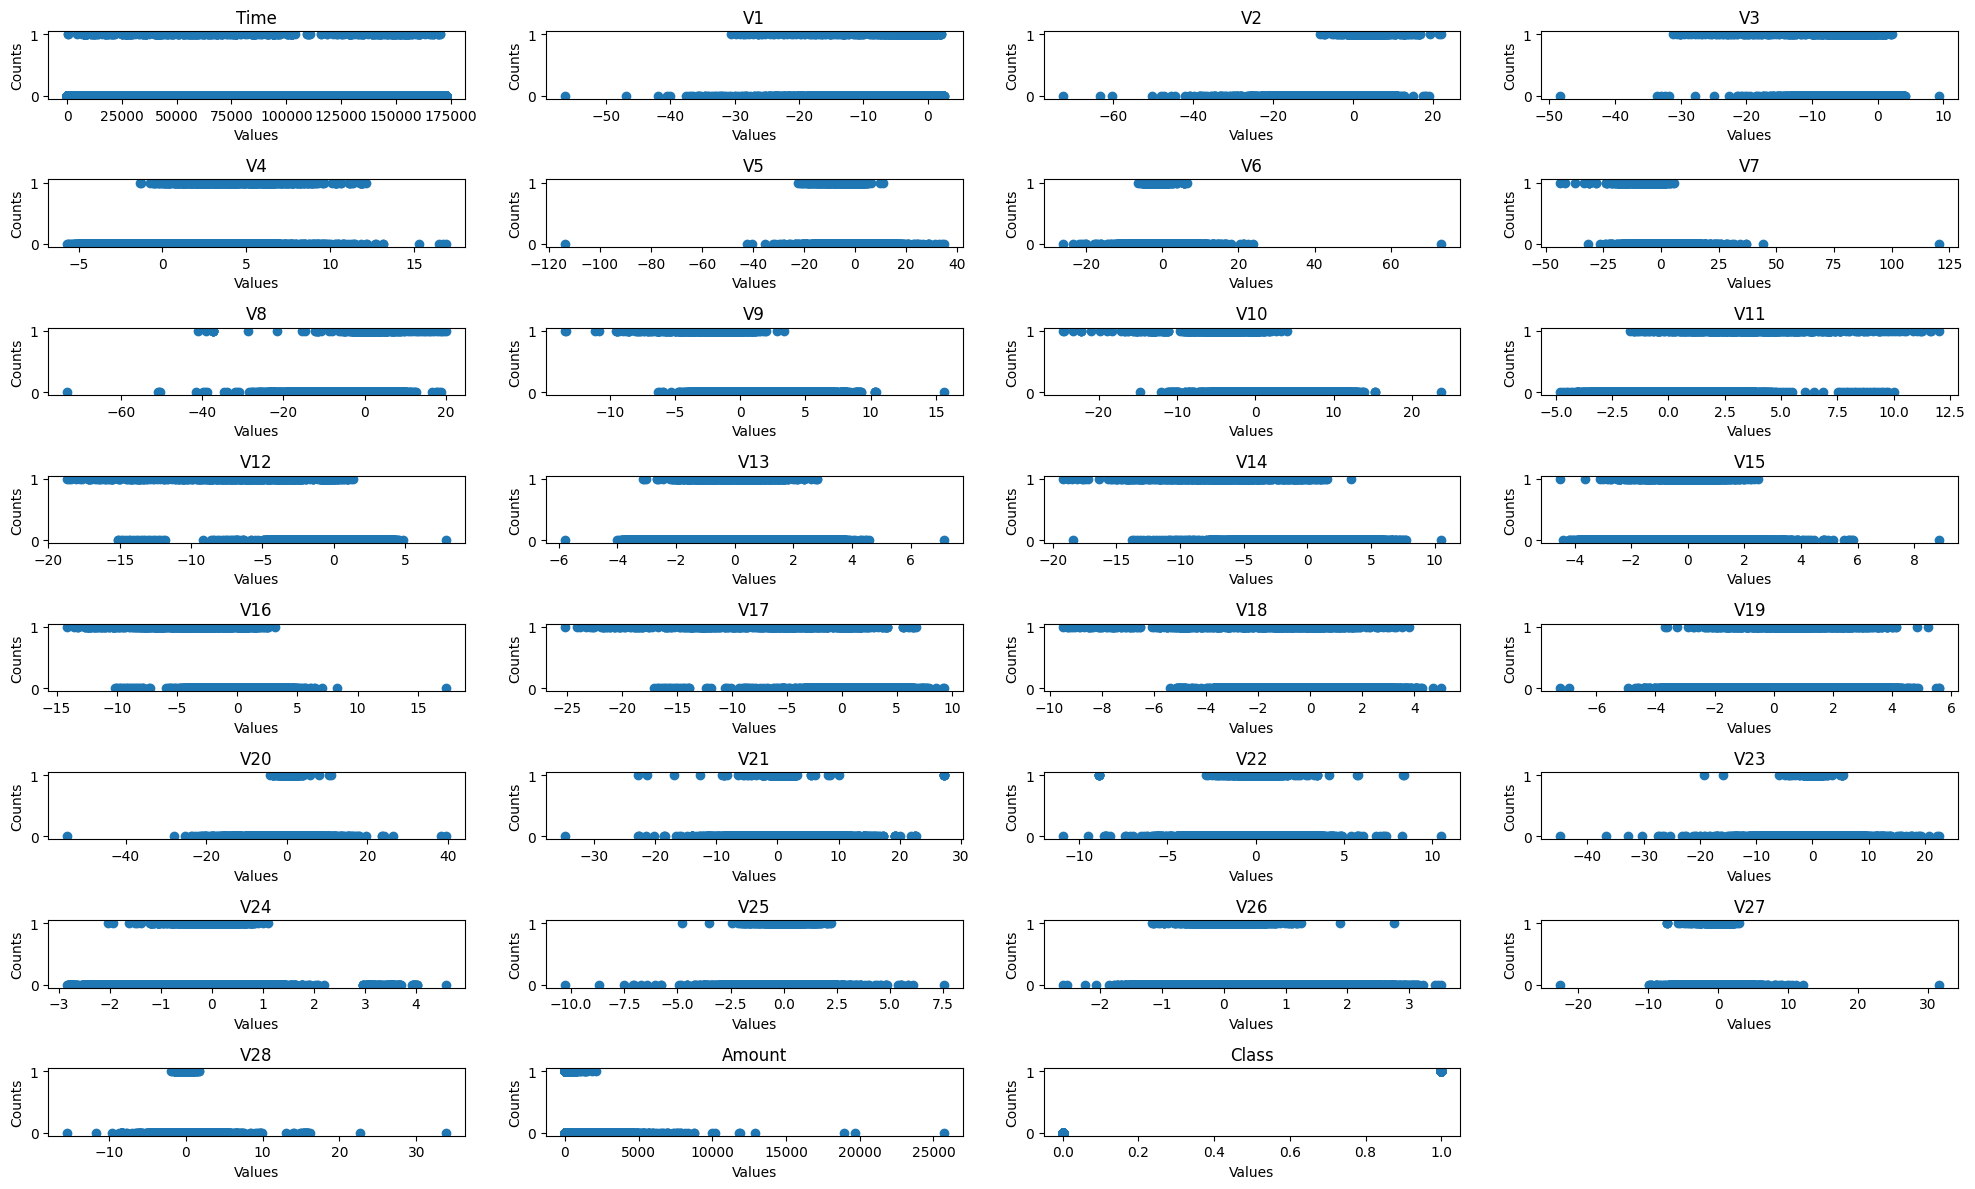

In [38]:
num_columns = len(df.columns)

# Set up the figure and axes
fig, axes = plt.subplots(8,4, figsize=(20, 12))
axes = axes.flatten()  # Flatten the 3x5 array of axes

# Plot the value counts for each column
for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.scatter(df[col], df['Class'])
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Counts')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

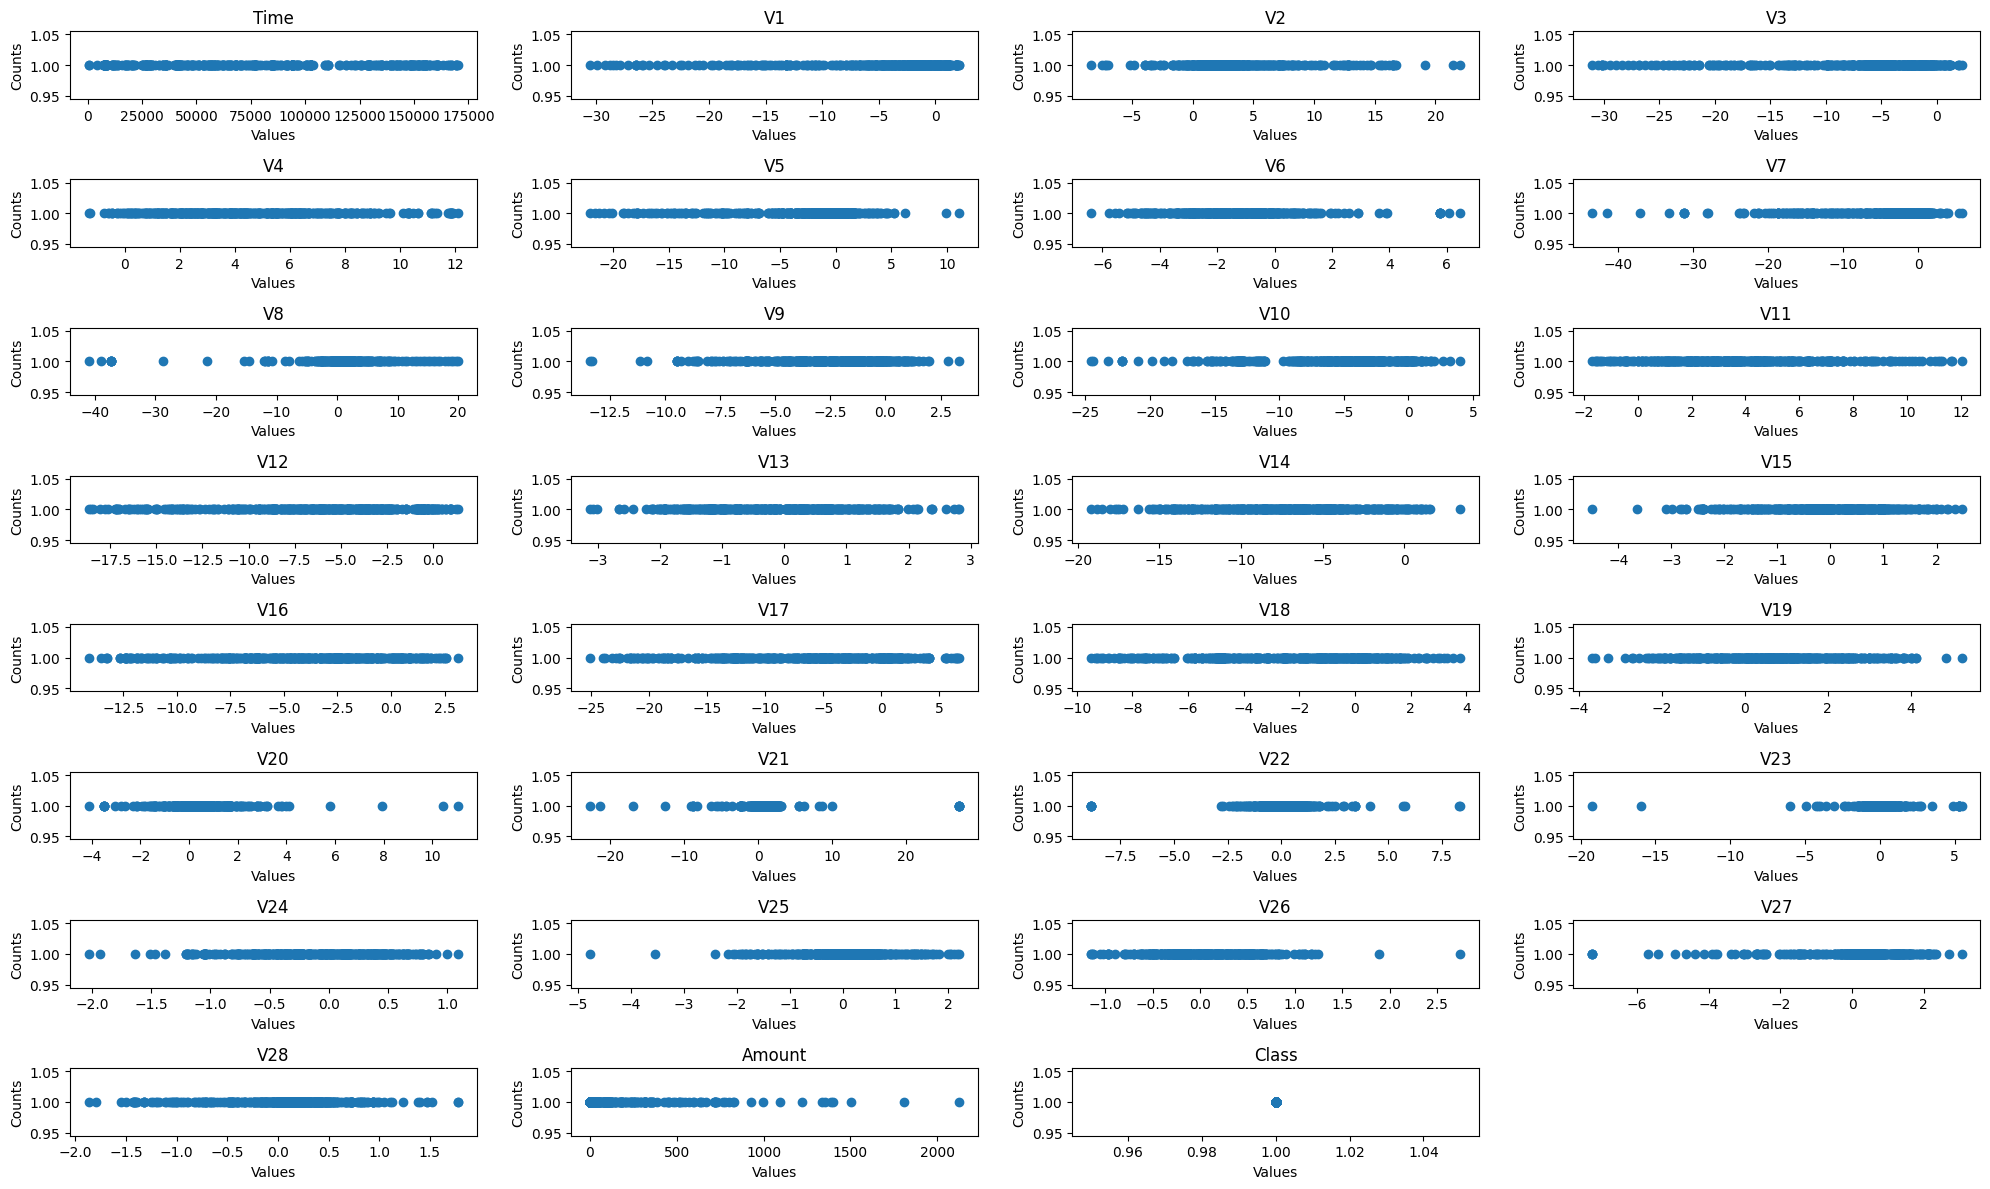

In [39]:
hf= df[df['Class']==1]
num_columns = len(hf.columns)

# Set up the figure and axes
fig, axes = plt.subplots(8,4, figsize=(20, 12))
axes = axes.flatten()  # Flatten the 3x5 array of axes

# Plot the value counts for each column
for i, col in enumerate(hf.columns):
    ax = axes[i]
    ax.scatter(hf[col], hf['Class'])
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Counts')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

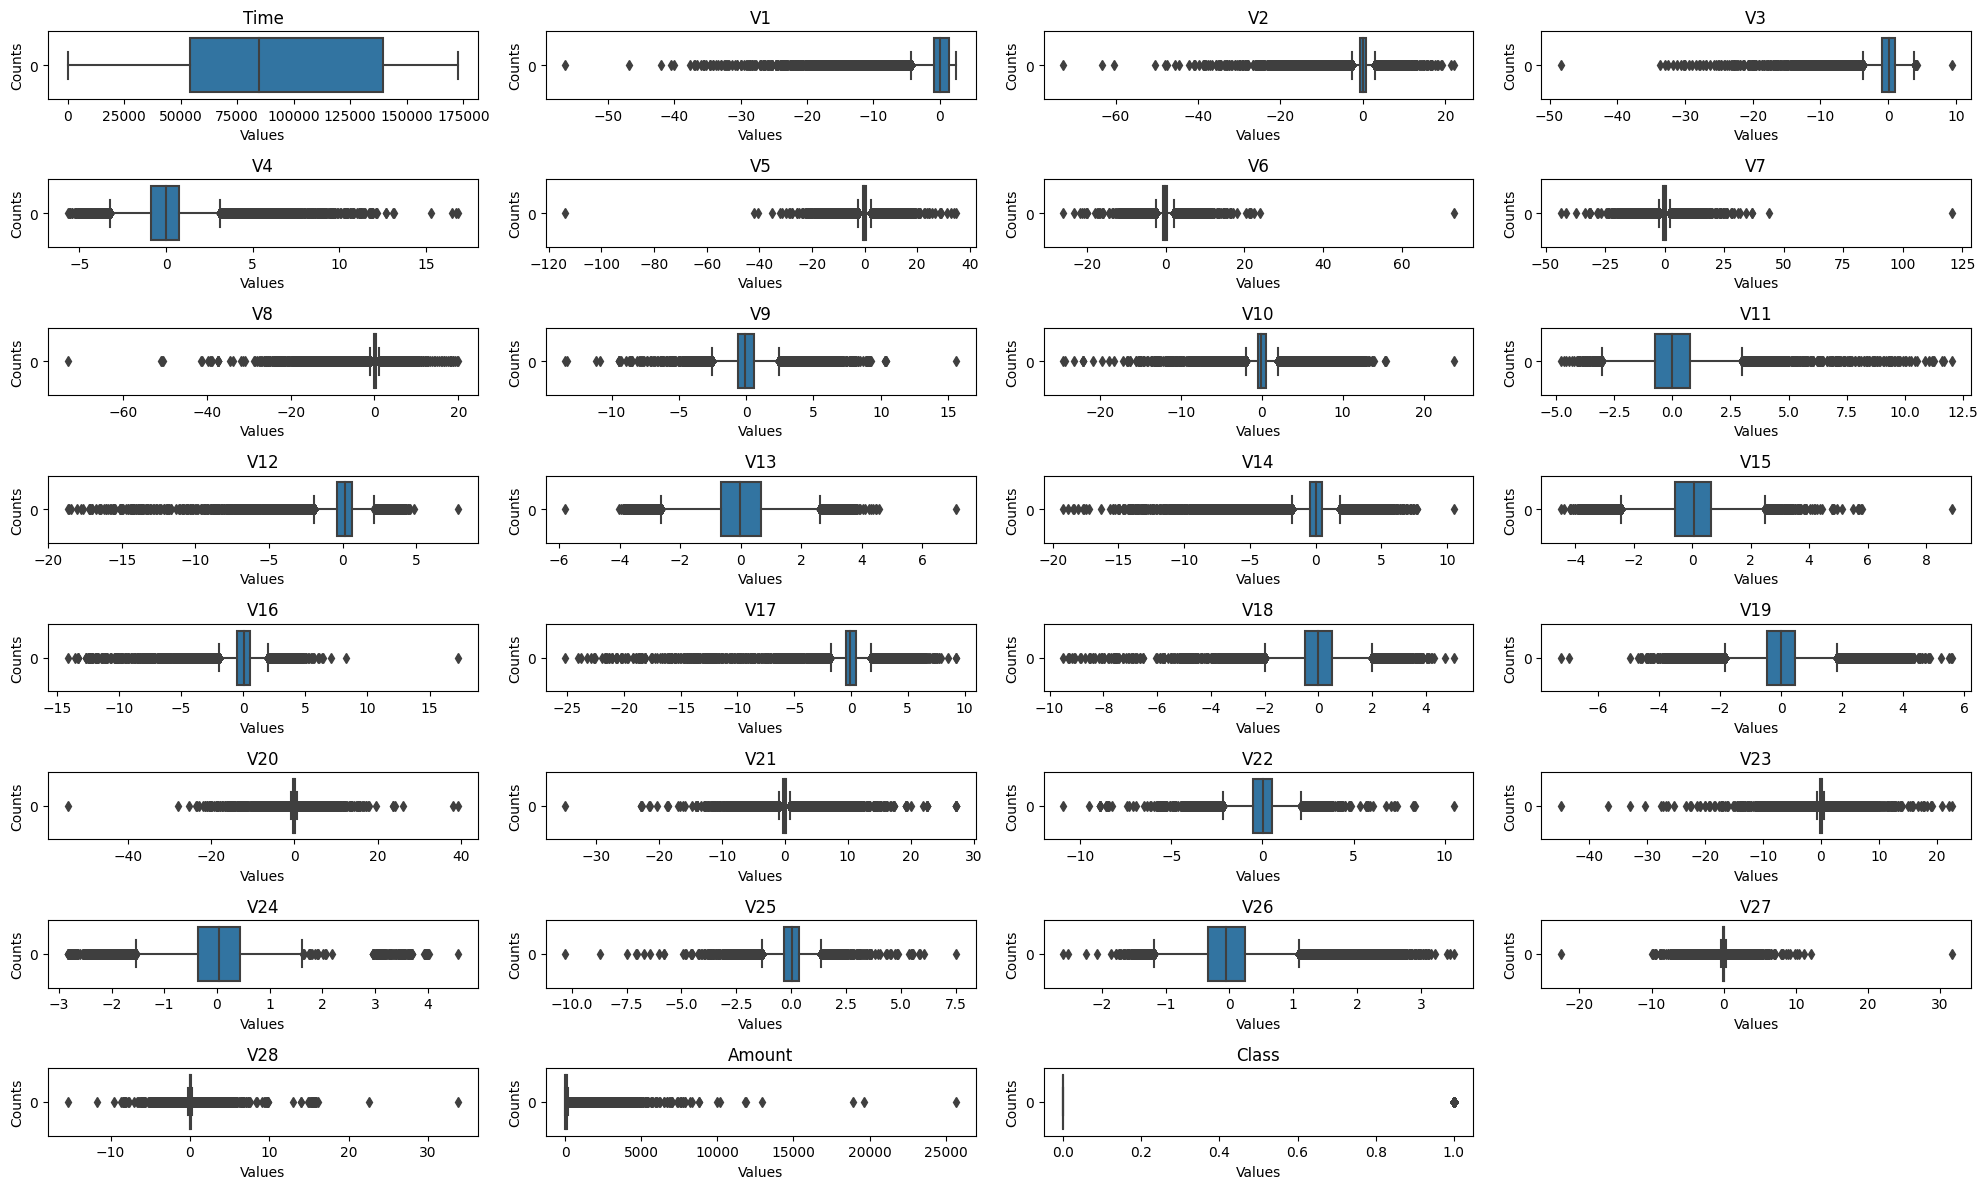

In [40]:
num_columns = len(df.columns)

# Set up the figure and axes
fig, axes = plt.subplots(8,4, figsize=(20, 12))
axes = axes.flatten()  # Flatten the 3x5 array of axes

# Plot the value counts for each column
for i, col in enumerate(df.columns):
    ax = axes[i]
    sns.boxplot(df[col],orient='h',ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Counts')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [7]:
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [8]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [40]:
X = df.drop('Class', axis=1)
y =  df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy={1:2000}, random_state=42)  
# smote = SMOTE( random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_train_resampled =scaler.fit_transform(X_train_resampled)
# X_test = scaler.transform(X_test)

In [41]:
pca = PCA(n_components=18, random_state=42)  # Adjust n_components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca2 = PCA(n_components=18, random_state=42)  # Adjust n_components as needed
X_train_pca_smote = pca2.fit_transform(X_train_resampled)
X_test_pca_smote  = pca2.transform(X_test)

In [42]:
def evaluation(model,xtest,ytest):
    pred=model.predict(xtest)


    accuracy = accuracy_score(ytest, pred)
    precision = precision_score(ytest, pred, average='macro')
    recall = recall_score(ytest, pred, average='macro')



    conf_matrix = confusion_matrix(ytest, pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(classification_report(ytest, pred))
    classes = ['genuine', 'fraudulent']

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.9991
Precision: 0.9315
Recall: 0.7907
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



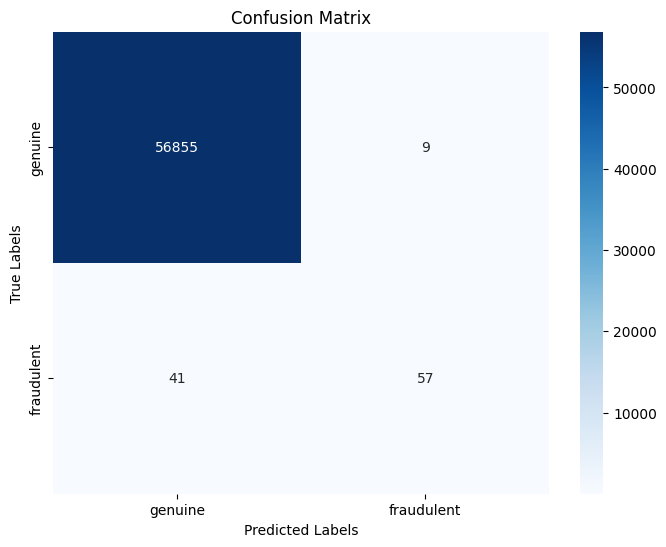

In [43]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

evaluation(LR,X_test,y_test)

Accuracy: 0.9992
Precision: 0.9078
Recall: 0.8621
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.72      0.77        98

    accuracy                           1.00     56962
   macro avg       0.91      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962



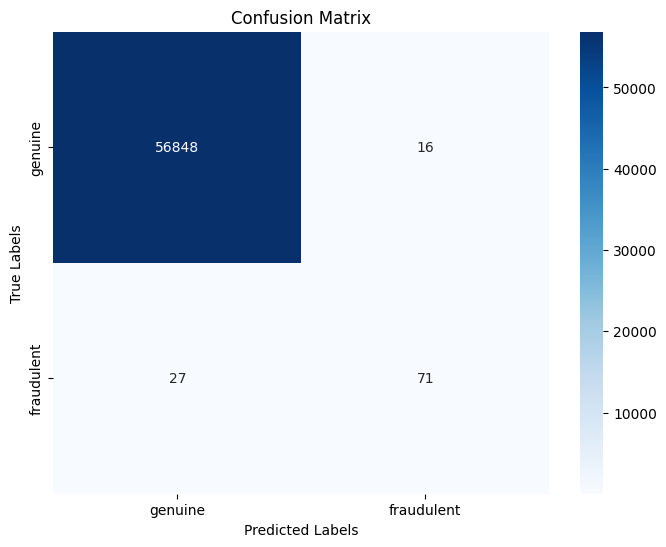

In [44]:
LR2 = LogisticRegression(class_weight={0:1,1:3})
LR2.fit(X_train, y_train)

evaluation(LR2,X_test,y_test)

Accuracy: 0.9993
Precision: 0.9109
Recall: 0.8774
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.76      0.79        98

    accuracy                           1.00     56962
   macro avg       0.91      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962



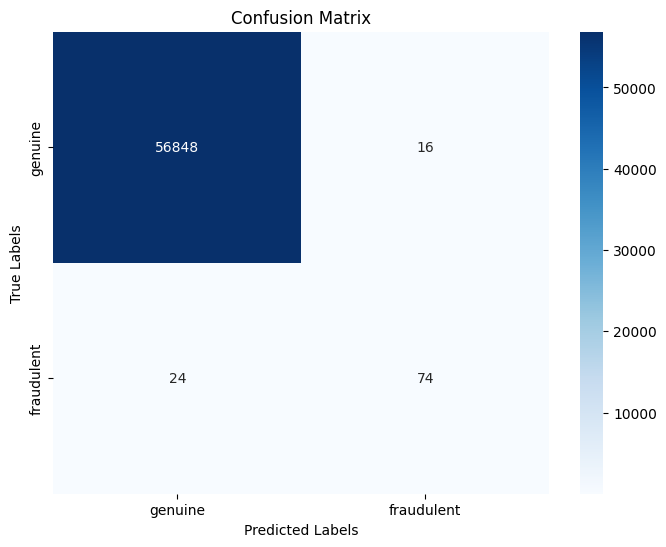

In [45]:
LR3 = LogisticRegression(class_weight={0:1,1:3})
LR3.fit(X_train_pca, y_train)

evaluation(LR3,X_test_pca,y_test)

Accuracy: 0.9993
Precision: 0.8819
Recall: 0.9130
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.83      0.79        98

    accuracy                           1.00     56962
   macro avg       0.88      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



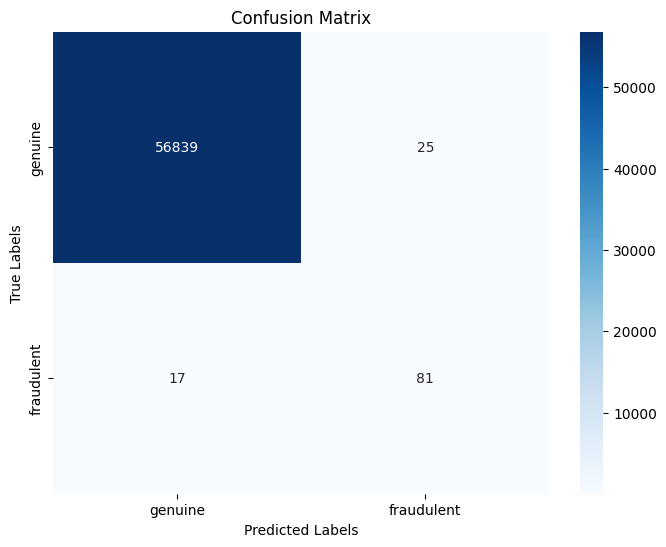

In [46]:
LR4 = LogisticRegression(class_weight={0:1,1:3})
LR4.fit(X_train_pca_smote, y_train_resampled)

evaluation(LR4,X_test_pca_smote,y_test)